
Created by @Mehmet Ozan UNAL
for BYM 509 @Istanbul Technical Univercity
# Maximum Likelihood  Estimation vs Maximum a Posteriori Notebook

##  Create Simulation Enviroment

In this example $Y=AX+N$ simulation enviroment will be created.
In this equation:
- Y is the observation
- A is system geometry parameters
- X is varible (the thing which is observed )
- N is randomly distrubuted zero mean gaussian noise

Size of this vector and matrices are:
$$ Y_{mx1}=A_{mxn}X_{nx1} + N_{mx1} $$


now contiune with code.

#### Import libraries


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

#plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib notebook 

#### Helper functions

In [2]:
#convert to vector
def toVector(a):
    return a.reshape(-1,1) 
    
def toImage(a):
    return a.reshape(K,L)

def convLog(arr):
    sample10 = np.mean( arr[0:10] )
    sample100 = np.mean( arr[0:100] )
    sample1_000 = np.mean( arr[0:1000] )
    sample10_000 = np.mean( arr[0:10000] )
    return [sample10, sample100, sample1_000, sample10_000]

#### Implementation of ML and MAP at 100x100

In [3]:
K = 100
L = 100
m = int(1.2*K*L)
n = K*L

# Create X read image
X_image = misc.imread('test/test1.jpg', mode="L") # grayscale mode
X_image = misc.imresize(X_image, (K,L))/ 255 # normalize image
X = toVector(X_image)
A = np.random.rand(m,n)


def calculateMaxlikelihood(A, X, NoisePower):
    # every time new noise will be generated randomly
    N =  (np.random.rand(m,1)-0.5) * NoisePower
    Y = A@X + N
    # return Xml
    return  np.linalg.inv(A.transpose() @ A ) @ A.transpose() @ Y

def calculateMaximumAPosteriori(A, X, NoisePower, B):
    # every time new noise will be generated randomly
    N =  (np.random.rand(m,1)-0.5) * NoisePower
    Y = A@X + N
    I1 = np.ones((n,n))
    I2 = np.ones((n,1))
    # return Xmap
    return  np.linalg.inv(A.transpose() @ A + B * I1 ) @ ( A.transpose() @ Y + B*X.mean()*I2)

print("Started.")
Xml =  calculateMaxlikelihood(A,X,1)
print("ML done.")
Xmap01 =  calculateMaximumAPosteriori(A,X,1,0.1)
print("MAP01 done")
Xmap03 =  calculateMaximumAPosteriori(A,X,1,0.3)
print("MAP03 done")
Xmap05 =  calculateMaximumAPosteriori(A,X,1,0.5)
print("MAP05 done")
Xmap10 =  calculateMaximumAPosteriori(A,X,1,1.0)
print("MAP10 done")


c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Started.
ML done.
MAP01 done
MAP03 done
MAP05 done
MAP10 done


<IPython.core.display.Javascript object>


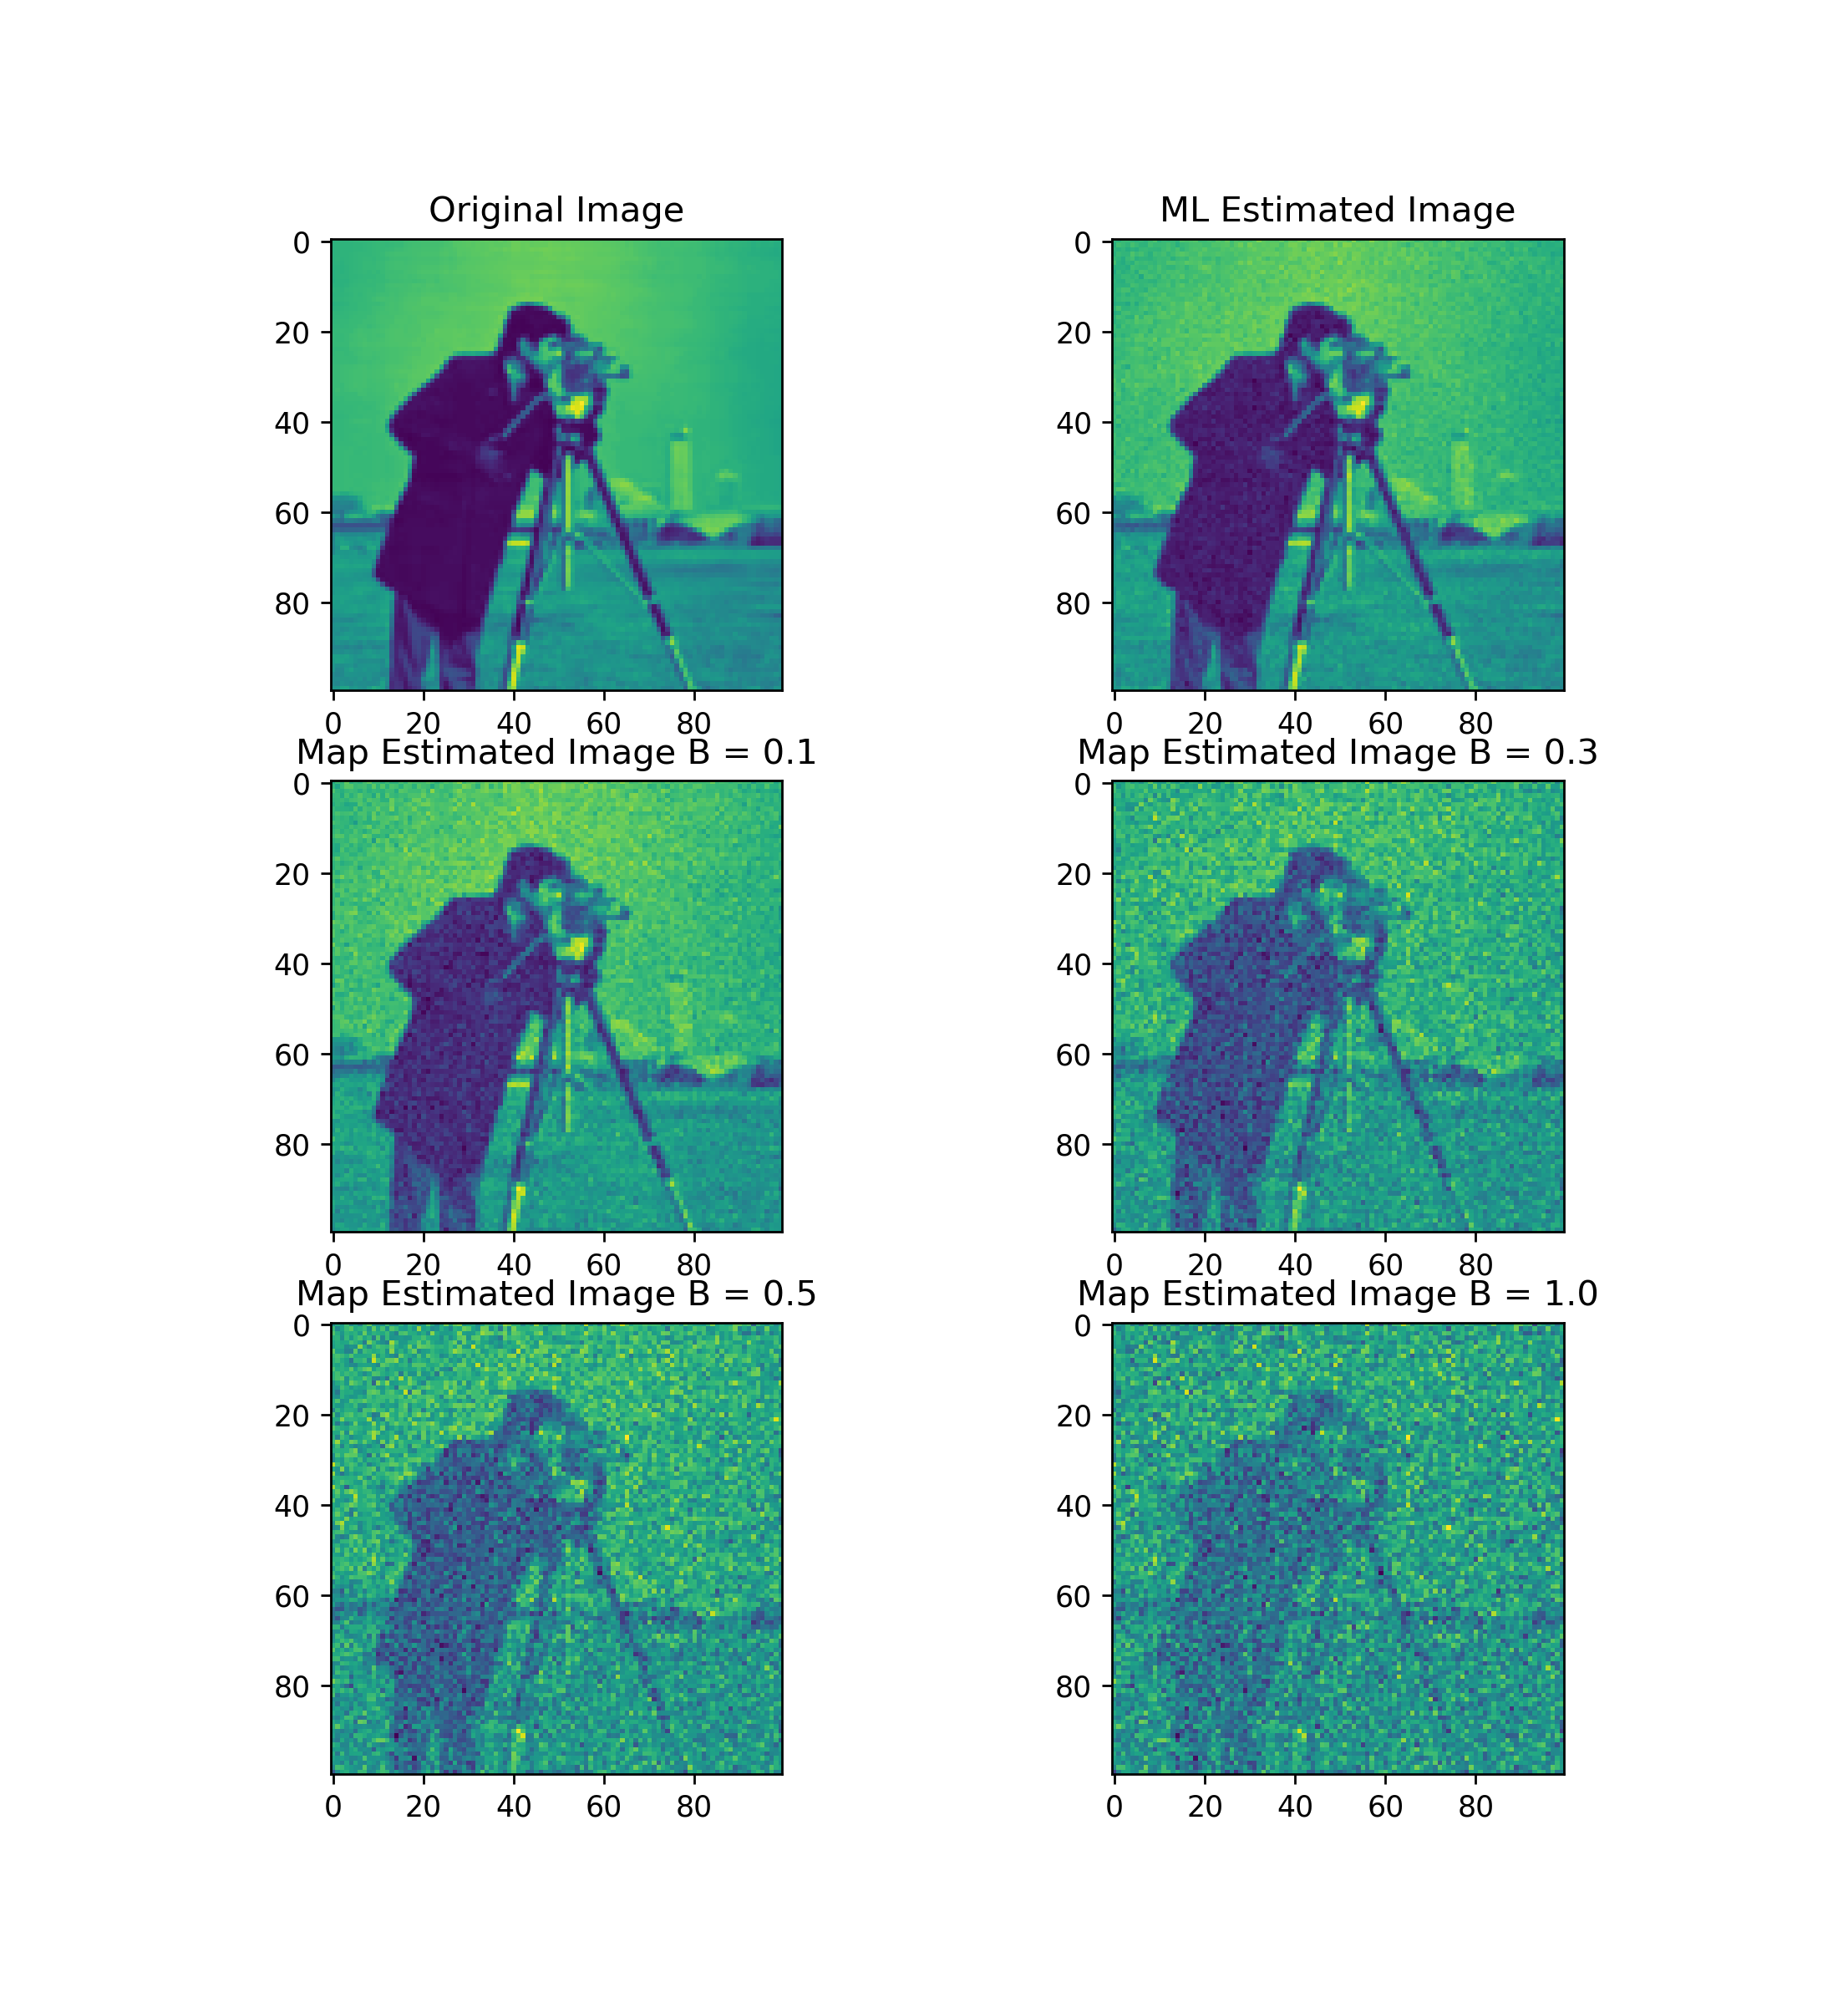

In [20]:
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax1.title.set_text('Original Image')
ax1.imshow(toImage(X))

ax2 = fig.add_subplot(322)
ax2.title.set_text('ML Estimated Image')
ax2.imshow(toImage(Xml))

ax3 = fig.add_subplot(323)
ax3.title.set_text('Map Estimated Image B = 0.1')
ax3.imshow(toImage(Xmap01))


ax4 = fig.add_subplot(324)
ax4.title.set_text('Map Estimated Image B = 0.3')
ax4.imshow(toImage(Xmap03))

ax5 = fig.add_subplot(325)
ax5.title.set_text('Map Estimated Image B = 0.5')
ax5.imshow(toImage(Xmap05))

ax6 = fig.add_subplot(326)
ax6.title.set_text('Map Estimated Image B = 1.0')
ax6.imshow(toImage(Xmap10))

plt.show()

#### Decrease sizes for fast calculations to 10x10

In [21]:
K = 10
L = 10
m = int(1.2*K*L)
n = K*L

# Create X read image
X_image = misc.imread('test/test1.jpg', mode="L") # grayscale mode
X_image = misc.imresize(X_image, (K,L))/ 255 # normalize image
X = toVector(X_image)
A = np.random.rand(m,n)


def calculateMaxlikelihood(A, X, NoisePower):
    # every time new noise will be generated randomly
    N =  (np.random.rand(m,1)-0.5) * NoisePower
    Y = A@X + N
    # return Xml
    return  np.linalg.inv(A.transpose() @ A ) @ A.transpose() @ Y

def calculateMaximumAPosteriori(A, X, NoisePower, B):
    # every time new noise will be generated randomly
    N =  (np.random.rand(m,1)-0.5) * NoisePower
    Y = A@X + N
    I1 = np.ones((n,n))
    I2 = np.ones((n,1))
    # return Xmap
    return  np.linalg.inv(A.transpose() @ A + B * I1 ) @ ( A.transpose() @ Y + B*X.mean()*I2)

    

c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
c:\users\mehmetozanunal\appdata\local\programs\python\python35\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


####  Bias Calculation
Bias is calculated as:

Theoritical bias of maximum likelihood is zero. It can be calculated as:

Therefore the real bias should be decrease with increase of tries


In [22]:
def calculcateBias(x, xml):
    B = x-xml
    return np.sum(B)
    

####  Varience Calculation
Varience of estimations calculated as:

$$
varience = \frac1{n} \sum\limits_{i=1}^n(x_i - \overline{x})^2 
$$


In [23]:
def calculateVarience(x, xml):
    V = np.square(xml-xml.mean()) 
    return V.mean()

#### Create Simulation Class
- To easily run simulations this class is created. This is using as container to save simulation results to and object and run this object with function pointer.

In [24]:

class sim:
    def __init__(self, name, func, noisePower=1, B=None):
        self.biasArr = []
        self.varArr = []
        self.mseArr = []
        self.name = name
        self.calculate = func
        self.noisePower = noisePower
        self.B = B
    
    def run(self):
        if self.B == None:
            X_ = self.calculate(A,X, self.noisePower)
        else:
            X_ = self.calculate(A,X, self.noisePower, self.B)
        self.biasArr.append(calculcateBias(X, X_))
        self.varArr.append(calculateVarience(X, X_))
        self.mseArr.append(
            self.biasArr[-1]*self.biasArr[-1] + self.varArr[-1]
        )


#### Run Simulation 1000 times for ML and Map with b=0.2 b=0.4 b=0.8 b=1.0 b=5.0
Run simulation 1000 times and save all bias, varience and mean square error to arrays

In [65]:
NOISE_POW = 1
sim_maxLikelihood = sim("Maximum Likelihood", calculateMaxlikelihood, noisePower=NOISE_POW)
sim_map02 = sim("MAP B=0.2", calculateMaximumAPosteriori, noisePower=NOISE_POW, B=0.2)
sim_map04 = sim("MAP B=0.4", calculateMaximumAPosteriori, noisePower=NOISE_POW, B=0.4)
sim_map08 = sim("MAP B=0.8", calculateMaximumAPosteriori, noisePower=NOISE_POW, B=0.8)
sim_map10 = sim("MAP B=1.0", calculateMaximumAPosteriori, noisePower=NOISE_POW, B=1.0)
sim_map50 = sim("MAP B=5.0", calculateMaximumAPosteriori, noisePower=NOISE_POW, B=5.0)

In [66]:

for i in range(1000):
    sim_maxLikelihood.run()
    sim_map02.run()
    sim_map04.run()
    sim_map08.run()
    sim_map10.run()
    sim_map50.run()
    if i % 100 == 0:
        print(i,)
print("Done.")

0
100
200
300
400
500
600
700
800
900
Done.


#### Result for different B values
#### Results Bias

<IPython.core.display.Javascript object>


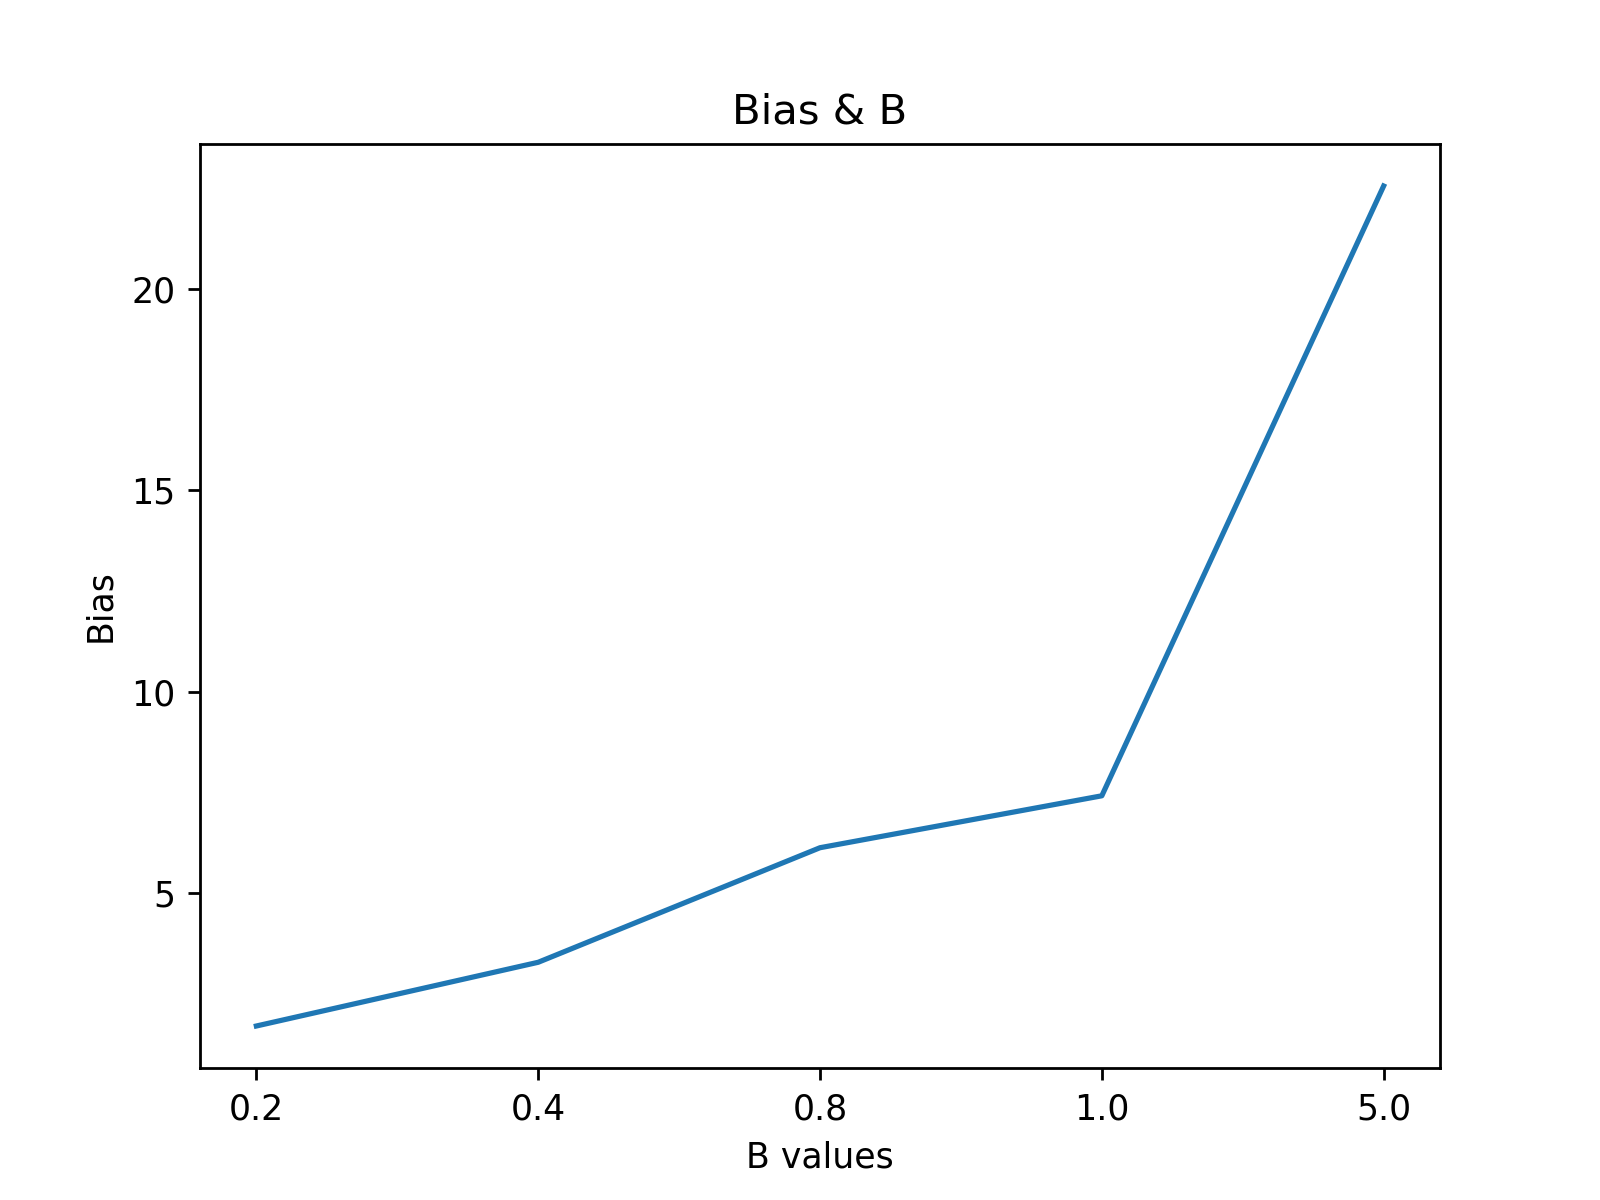

In [85]:
 
plt.figure()
biasAll = [ np.mean(sim_map02.biasArr), np.mean(sim_map04.biasArr),
           np.mean(sim_map08.biasArr),np.mean(sim_map10.biasArr), np.mean(sim_map50.biasArr)  ]
plt.plot(["0.2","0.4","0.8","1.0","5.0"], biasAll)
plt.title('Bias & B')
plt.xlabel('B values')
plt.ylabel('Bias')
plt.show()

#### Result Varience

<IPython.core.display.Javascript object>


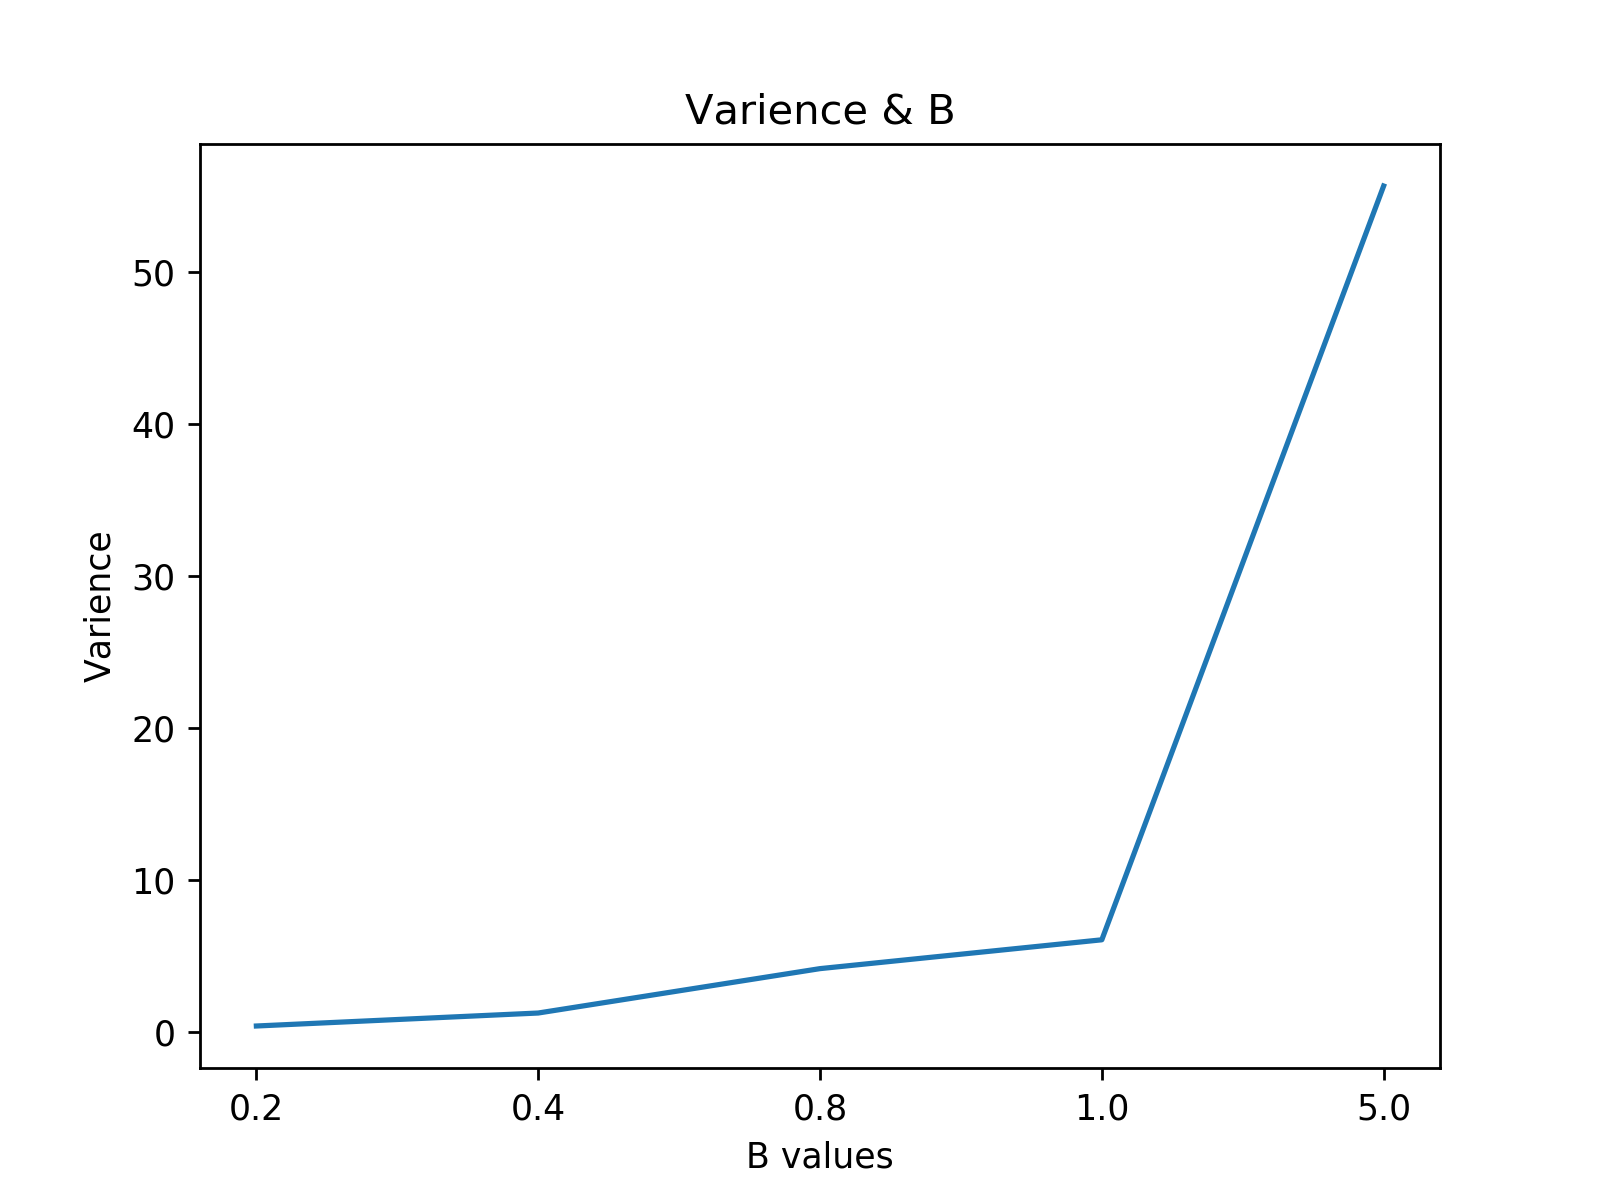

In [86]:
plt.figure()
varAll = [ np.mean(sim_map02.varArr), np.mean(sim_map04.varArr),
           np.mean(sim_map08.varArr),np.mean(sim_map10.varArr), np.mean(sim_map50.varArr)  ]
plt.plot(["0.2","0.4","0.8","1.0","5.0"], varAll)
plt.title('Varience & B')
plt.xlabel('B values')
plt.ylabel('Varience')
plt.show()

#### Result MSE

<IPython.core.display.Javascript object>


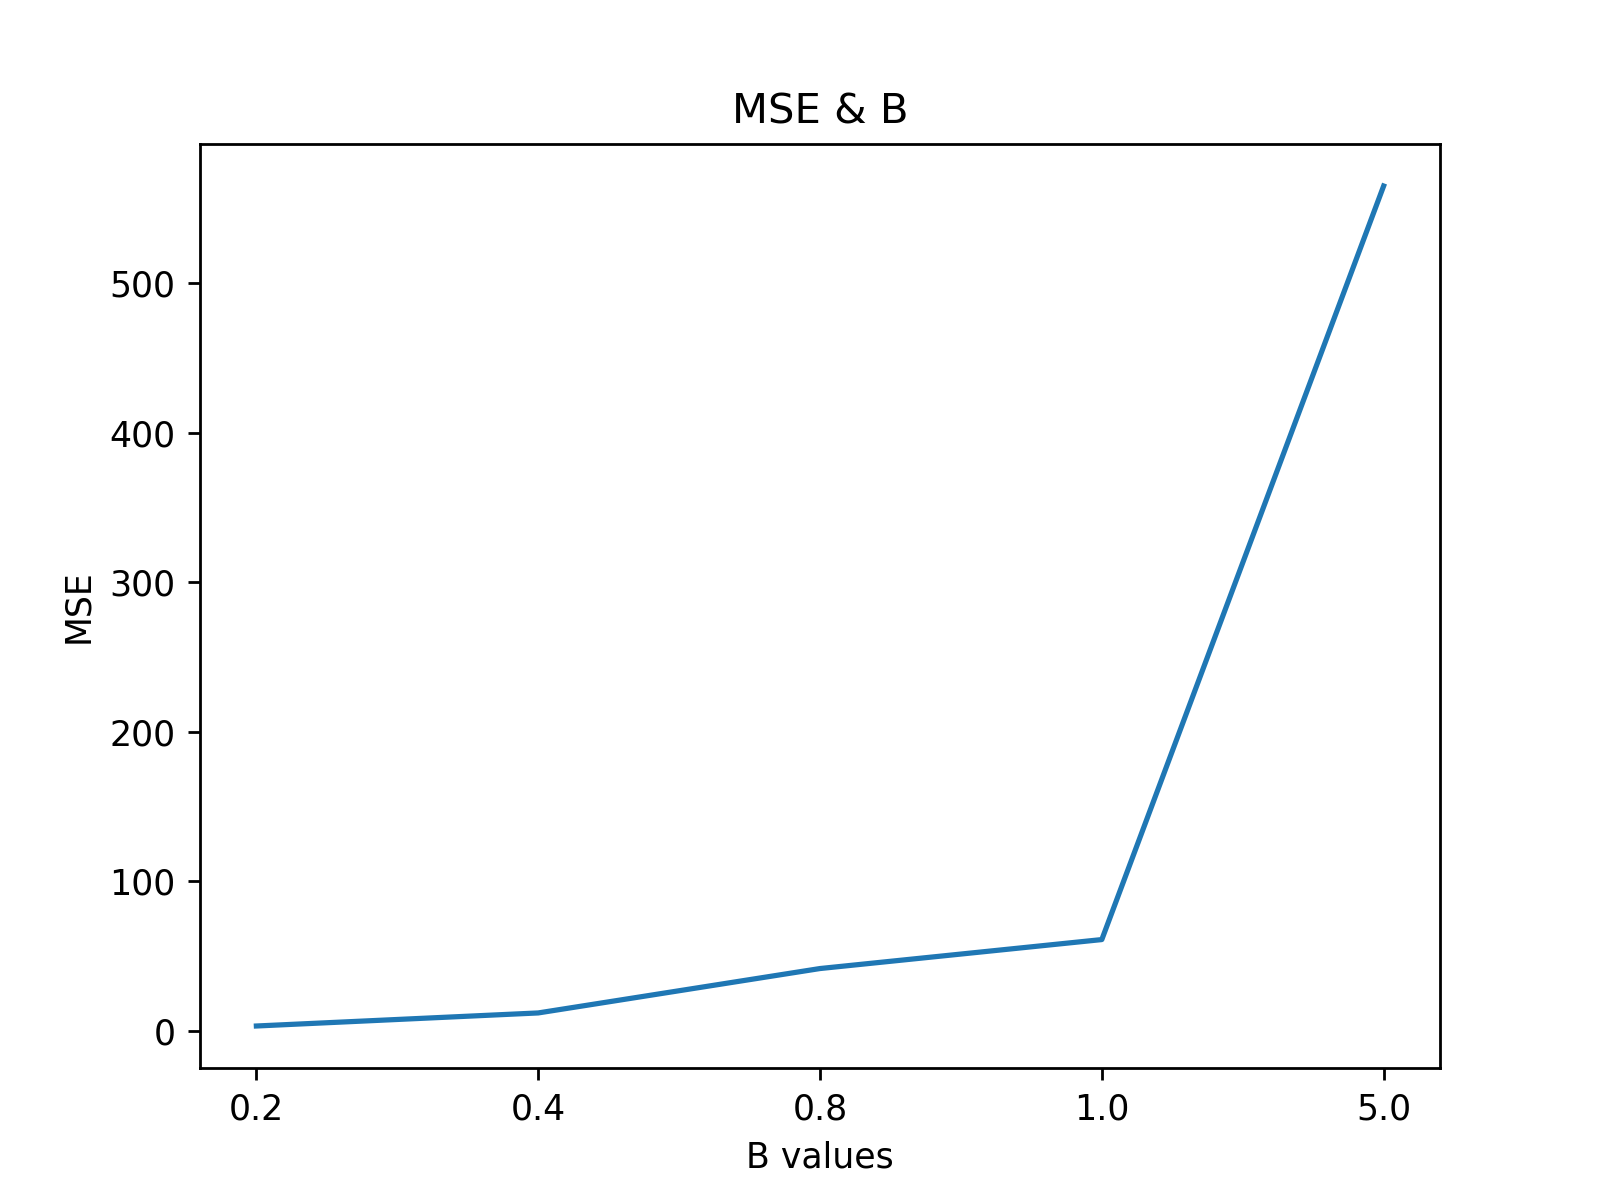

In [87]:
plt.figure()
mseAll = [ np.mean(sim_map02.mseArr), np.mean(sim_map04.mseArr),
           np.mean(sim_map08.mseArr),np.mean(sim_map10.mseArr), np.mean(sim_map50.mseArr)  ]
plt.plot(["0.2","0.4","0.8","1.0","5.0"], mseAll)
plt.title('MSE & B')
plt.xlabel('B values')
plt.ylabel('MSE')
plt.show()

### Run Simulation 10,000 times for different power level noise


In [88]:
sim_map_noise01 = sim("MAP N=0.1", calculateMaximumAPosteriori, noisePower=0.1, B=0.3)
sim_map_noise02 = sim("MAP N=0.2", calculateMaximumAPosteriori, noisePower=0.2, B=0.3)
sim_map_noise04 = sim("MAP N=0.4", calculateMaximumAPosteriori, noisePower=0.4, B=0.3)
sim_map_noise08 = sim("MAP N=0.8", calculateMaximumAPosteriori, noisePower=0.8, B=0.3)

In [89]:
for i in range(10000):
    sim_map_noise01.run()
    sim_map_noise02.run()
    sim_map_noise04.run()
    sim_map_noise08.run()
    if i % 1000 == 0:
        print(i,)
print("Done.")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Done.


<IPython.core.display.Javascript object>


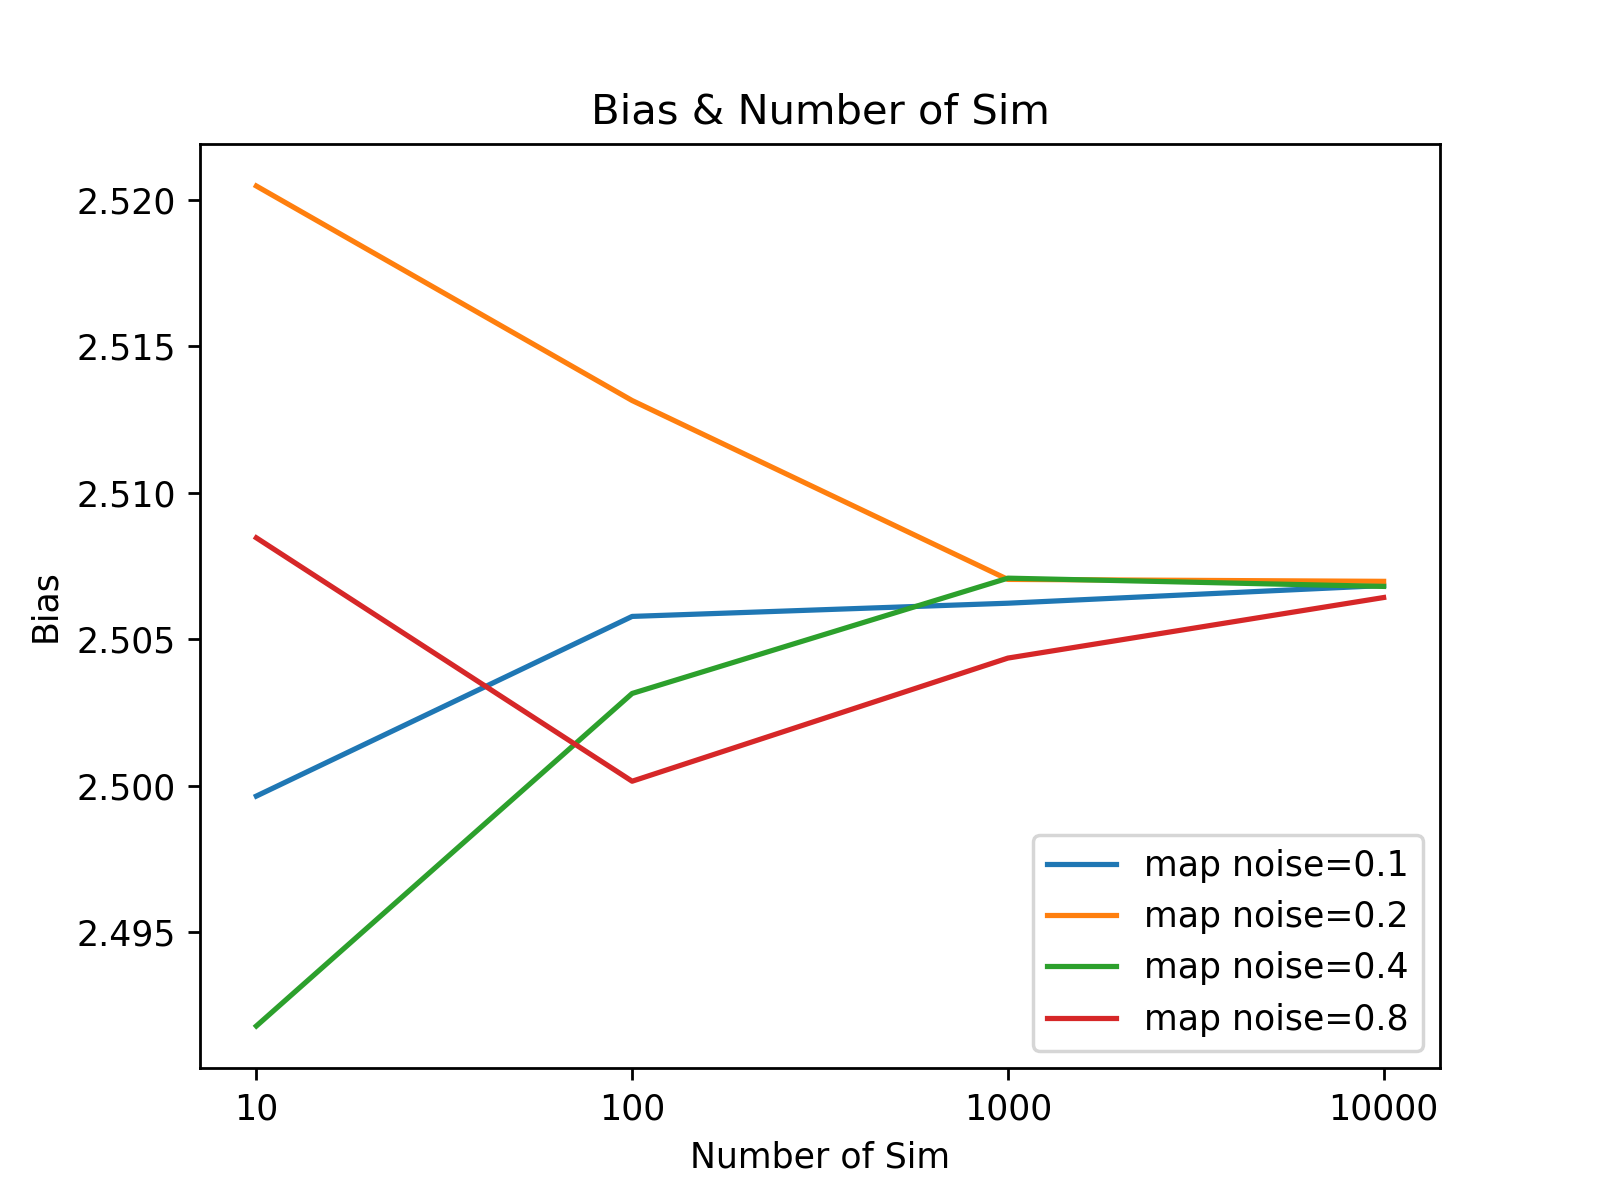

In [93]:
plt.figure()
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise01.biasArr), label="map noise=0.1")
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise02.biasArr), label="map noise=0.2")
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise04.biasArr), label="map noise=0.4")
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise08.biasArr), label="map noise=0.8")
plt.legend(loc='lower right')
plt.title('Bias & Number of Sim')
plt.xlabel('Number of Sim')
plt.ylabel('Bias')
plt.show()

<IPython.core.display.Javascript object>


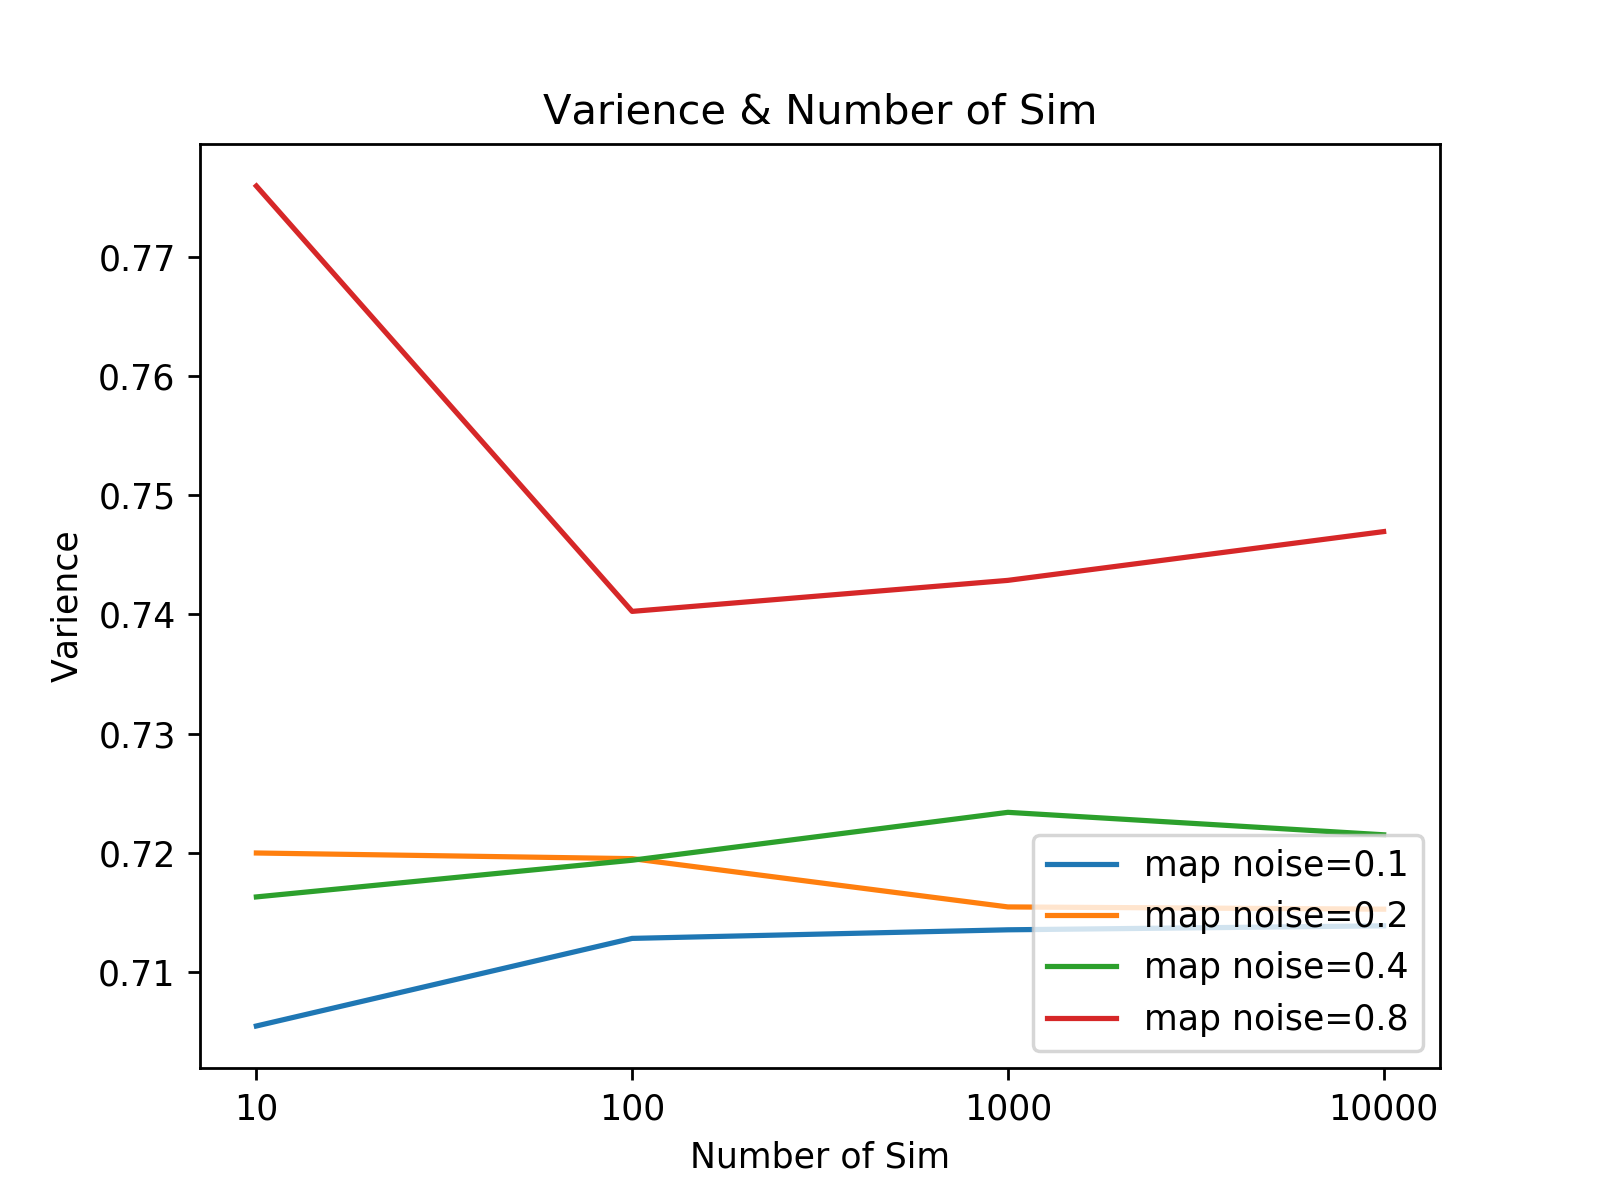

In [94]:
plt.figure()
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise01.varArr),label="map noise=0.1")
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise02.varArr),label="map noise=0.2")
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise04.varArr),label="map noise=0.4")
plt.plot(["10","100","1000","10000"],convLog(sim_map_noise08.varArr),label="map noise=0.8")
plt.legend(loc='lower right')
plt.title('Varience & Number of Sim')
plt.xlabel('Number of Sim')
plt.ylabel('Varience')
plt.show()